#### <div style="text-align: right"> Project 1 | Group 3 | SMU Data Science Bootcamp </div>

# NYC Uber Analysis 

In [1]:
# Import Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.linear_model import LinearRegression
import datetime as dt
from datetime import timedelta
import time
import seaborn as sns
import dateutil.parser
import scipy.stats as stats
import pylab as pl
import scipy as sp

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Read and display the data
df = pd.read_csv(r"C:\Users\AG\Documents\SMU-Project1-Group3\uberdata.csv")
df.head()

,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,trip_id
0,6A,5C,2015-07-24 17:00:00,1.47,0:17:54,0
1,15,15,2015-05-29 23:00:00,1.71,0:06:02,1
2,2A,2C,2015-07-13 23:00:00,1.44,0:08:46,2
3,8,11,2015-07-26 23:00:00,7.14,0:14:02,3
4,7A,9,2014-11-30 19:00:00,19.45,0:46:07,4


In [3]:
#Review data information
df.info()
print("*"*20)
print(f'This data set has {len(df.origin_taz)} rows of data.')
print(f'The number of unique pick-up locations in the data set is {len(df.origin_taz.unique())} while the number of unique drop-off locations is {len(df.origin_taz.unique())}.')
print("*"*20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95922 entries, 0 to 95921
Data columns (total 6 columns):
origin_taz         95922 non-null object
destination_taz    95922 non-null object
pickup_datetime    95922 non-null object
trip_distance      95922 non-null float64
trip_duration      95922 non-null object
trip_id            95922 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB
********************
This data set has 95922 rows of data.
The number of unique pick-up locations in the data set is 28 while the number of unique drop-off locations is 28.
********************


In [4]:
#Check trips occurred from one neighborhood to a different one
left_neighborhood = [x.origin_taz != x.destination_taz for indx, x in df.iterrows()]
df["LeftNeighborhood"] = left_neighborhood

#Check trips occurred in the same neighborhood
stayed_neighborhood = [x.origin_taz == x.destination_taz for indx, x in df.iterrows()]
df["StayedNeighborhood"] = stayed_neighborhood

#Print results
print(f'The total number of trips that have occurred within the same neighborhood is {df["StayedNeighborhood"].sum()} ({round(df["StayedNeighborhood"].sum()/len(df["StayedNeighborhood"]), 2)*100}%)')
print(f'The total number of trips that have not occurred within the same neighborhood is {df["LeftNeighborhood"].sum()} ({round(df["LeftNeighborhood"].sum()/len(df["LeftNeighborhood"]), 2)*100}%)')

The total number of trips that have occurred within the same neighborhood is 16913 (18.0%)
The total number of trips that have not occurred within the same neighborhood is 79009 (82.0%)


In [5]:
#Create DataFrame and drop index
%matplotlib inline
groupedOrigin = pd.DataFrame(df.origin_taz.value_counts()).reset_index()
groupedOrigin.columns = ["Neighborhood", "OriginTrips"]

groupeddestination = pd.DataFrame(df.destination_taz.value_counts()).reset_index()
groupeddestination.columns = ["Neighborhood", "DestinationTrips"]

# Merge two dataframes using a left join
merge_table = pd.merge(groupedOrigin, groupeddestination, on="Neighborhood", how="left")

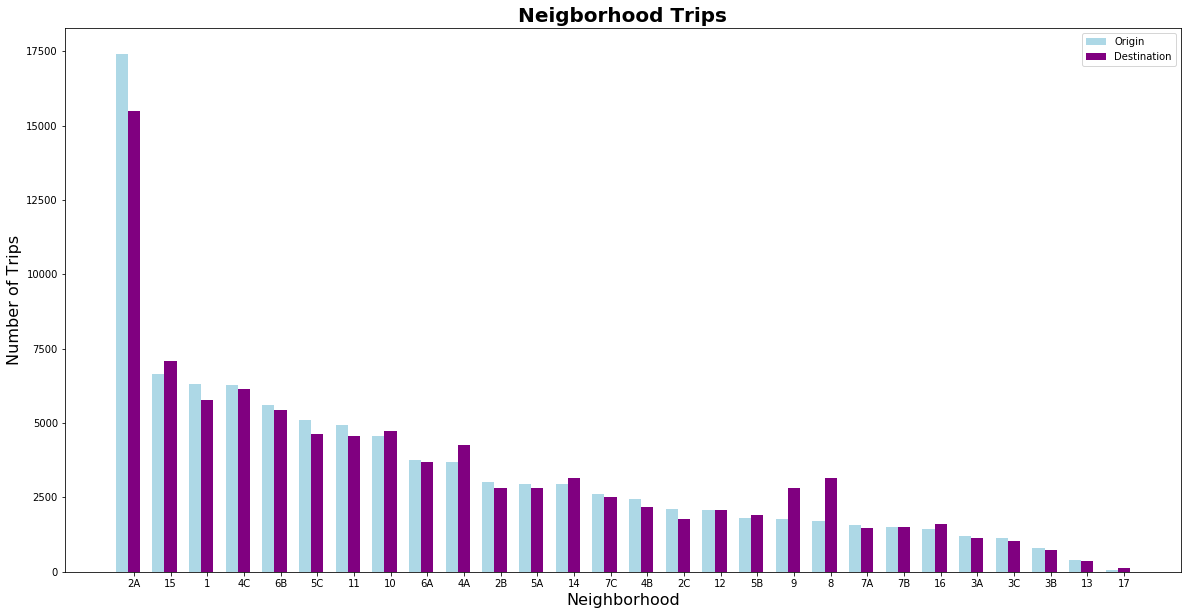

<Figure size 432x288 with 0 Axes>

In [24]:
#https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

#Create plot 
width = 1/2

indices=merge_table.index

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

width = np.min(np.diff(indices))/3

ax.bar(indices-width, merge_table.OriginTrips,width,color='lightblue',label='Origin')
ax.bar(indices, merge_table.DestinationTrips,width,color='purple',label='Destination')

plt.legend(loc="best")

plt.xticks(indices, merge_table.Neighborhood)

#Create plot title and label for x-axis and y-axis
plt.title("Neigborhood Trips", weight="bold", fontsize=20)
plt.xlabel("Neighborhood", fontsize=16)
plt.ylabel("Number of Trips", fontsize=16)
plt.show()

#Save plot
plt.savefig(r"C:\Users\AG\Documents\SMU-Project1-Group3\neighborhood_trips.png")

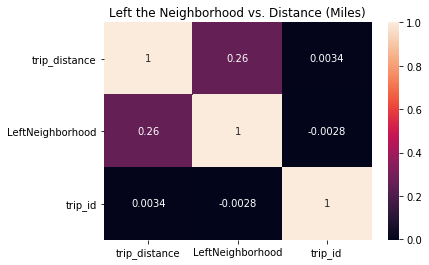

In [22]:
#Create heat map for the correlation between leaving neighborhood and trip distance
sns.heatmap(df[["trip_duration", "trip_distance", "LeftNeighborhood", "trip_id"]].corr(),annot=True)
plt.title('Left the Neighborhood vs. Distance (Miles)')

#Save figure
plt.savefig(r"C:\Users\AG\Documents\SMU-Project1-Group3\leftneighborhood_distance_heatmap.png")

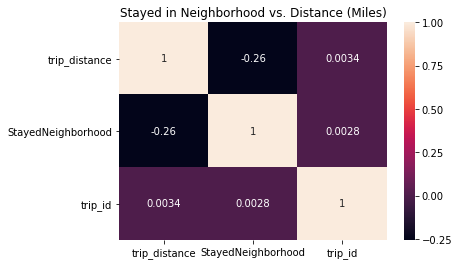

In [23]:
#Create heat map for the correlation between leaving neighborhood and trip distance
sns.heatmap(df[["trip_duration", "trip_distance", "StayedNeighborhood", "trip_id"]].corr(),annot=True)
plt.title('Stayed in Neighborhood vs. Distance (Miles)')


#Save figure
plt.savefig(r"C:\Users\AG\Documents\SMU-Project1-Group3\stayneighborhood_distance_heatmap.png")

In [9]:
# "Pickup datetime" column is an object. 
# Using pandas split months, days and hours and add them to DataFrame as columns
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
months = [x.month for x in df.pickup_datetime]
df["Months"] = months

days = [x.day for x in df.pickup_datetime]
df["Days"] = days

hours = [x.hour for x in df.pickup_datetime]
df["Hours"] = hours

#Display Data
df.head()

,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,trip_id,LeftNeighborhood,StayedNeighborhood,Months,Days,Hours
0,6A,5C,2015-07-24 17:00:00,1.47,0:17:54,0,True,False,7,24,17
1,15,15,2015-05-29 23:00:00,1.71,0:06:02,1,False,True,5,29,23
2,2A,2C,2015-07-13 23:00:00,1.44,0:08:46,2,True,False,7,13,23
3,8,11,2015-07-26 23:00:00,7.14,0:14:02,3,True,False,7,26,23
4,7A,9,2014-11-30 19:00:00,19.45,0:46:07,4,True,False,11,30,19


In [10]:
#Pull up new year data
new_year = df.loc[(df['Days'] == 31) & (df['Months']==1)]

#Pull up the rest of data (excluding new year eve)
rest_data = df.loc[(df['Days'] != 31) | (df['Months']!=1)]

#Print results
print(f'The number of trips occured on new year eve is {len(new_year)}.')
print(f'The average daily number of trips occured except new year is {round(len(rest_data)/365)}.')

The number of trips occured on new year eve is 337.
The average daily number of trips occured except new year is 262.


In [11]:
# Create a random sample from rest of data (excluding new year eve)
random_sample_df = rest_data.sample(n=337, random_state=42)

In [12]:
# Compare variances of two samples for t test 
new_year["trip_distance"].var()
random_sample_df["trip_distance"].var()


new_year["trip_distance"].mean()
rest_data["trip_distance"].mean()

# Print results
print(f'Variance of the distances of the trips occured on new year eve is {round(new_year["trip_distance"].var())}')
print(f'Variance of the distances of the trips occured except new year eve is {round(random_sample_df["trip_distance"].var())}')
print(f'Mean of the distances of the trips occured on new year eve is {round(new_year["trip_distance"].mean())}')
print(f'Mean of the distances of the trips occured except new year eve is {round(random_sample_df["trip_distance"].mean())}')

Variance of the distances of the trips occured on new year eve is 16
Variance of the distances of the trips occured except new year eve is 24
Mean of the distances of the trips occured on new year eve is 4
Mean of the distances of the trips occured except new year eve is 5


In [13]:
# Since the means and the variances appear to be close to each other we will do an Independent Samples t Test 
ttest = stats.ttest_ind(new_year["trip_distance"], random_sample_df["trip_distance"], equal_var = True)
print(f'p-value = {ttest[1]}')

p-value = 0.019674970830755704


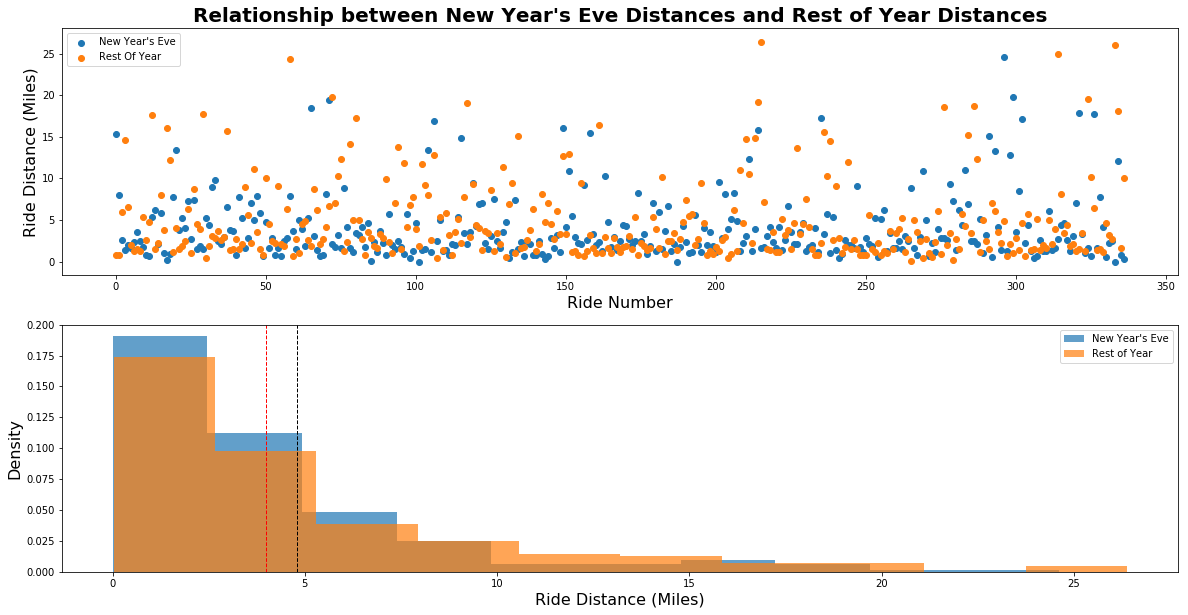

In [14]:
# Scatter Plot of Data
plt.figure(figsize=(20,10))


plt.subplot(2, 1, 1)
plt.scatter(range(len(new_year["trip_distance"])), new_year["trip_distance"], label="New Year's Eve")
plt.scatter(range(len(random_sample_df["trip_distance"])), random_sample_df.trip_distance, label="Rest Of Year")
plt.xlabel("Ride Number", fontsize=16)
plt.ylabel("Ride Distance (Miles)", fontsize=16)
plt.legend()

plt.title("Relationship between New Year's Eve Distances and Rest of Year Distances", weight="bold", fontsize=20)

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(new_year.trip_distance, 10, density=True, alpha=0.7, label="New Year's Eve")
plt.hist(random_sample_df.trip_distance, 10, density=True, alpha=0.7, label="Rest of Year")
plt.axvline(new_year.trip_distance.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(random_sample_df.trip_distance.mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel("Ride Distance (Miles)", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend()  


plt.show()

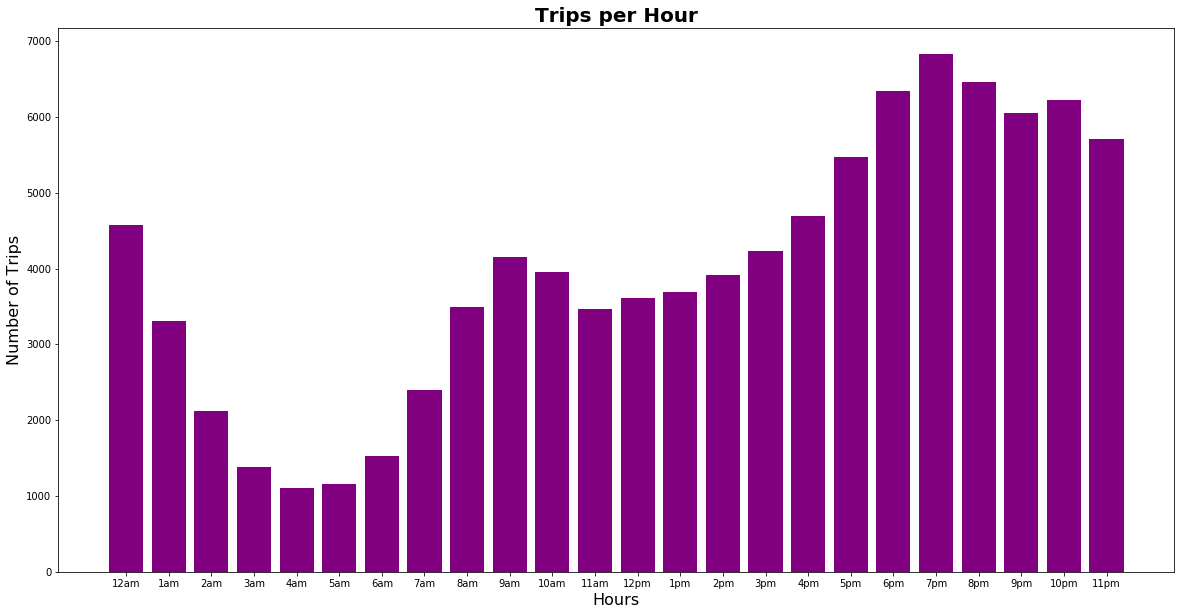

In [15]:

hourData = pd.DataFrame(df.Hours.value_counts()).reset_index()
hourData.columns = ["Hour", "TripCount"]
hourData = hourData.sort_values("Hour").reset_index()

plt.figure(figsize=(20,10))

plt.bar(hourData.Hour, hourData.TripCount, color="purple")
plt.title("Trips per Hour", weight="bold", fontsize=20)
plt.xlabel("Hours", fontsize=16)
plt.ylabel("Number of Trips", fontsize=16)


labels = ["12am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm",
         "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]


plt.xticks(hourData.Hour, labels)


plt.show()

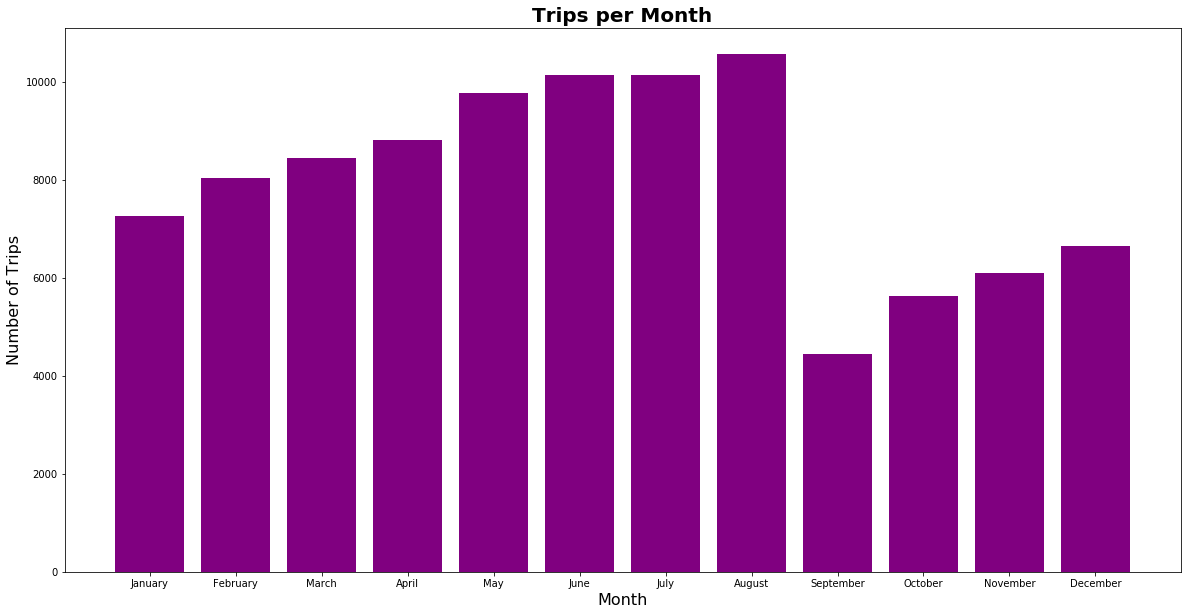

In [16]:
MonthData = pd.DataFrame(df.Months.value_counts()).reset_index()
MonthData.columns = ["Month", "TripCount"]
MonthData = MonthData.sort_values("Month").reset_index()

#Months vs number of trips 


plt.figure(figsize=(20,10))

plt.bar(MonthData.Month, MonthData.TripCount, color="purple")
plt.title("Trips per Month", weight="bold", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Trips", fontsize=16)


labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September","October","November", "December"]


plt.xticks(MonthData.Month, labels)


plt.show()

In [20]:
def strip_seconds(stringMinutes):
    
    return sum(np.array([int(x) for x in stringMinutes.split(":")]) * [3600, 60, 1])


df["trip_duration_seconds"] = df["trip_duration"].map(strip_seconds)

df_strip = df[(df.trip_duration_seconds<=df.trip_duration_seconds.quantile(0.75))&(df.trip_duration_seconds>=120)]


# Label Variables
x= df_strip['trip_distance']
y= df_strip['trip_duration_seconds']

import random

lolz = [random.randint(0, 100) for i in range(len(x))]




linreg = sp.stats.linregress(x, y)

import statsmodels.api as sm # import statsmodels
X = list(zip(x, lolz)) ## X usually means our input variables (or independent variables)
y = y ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     trip_duration_seconds   R-squared:                       0.408
Model:                               OLS   Adj. R-squared:                  0.408
Method:                    Least Squares   F-statistic:                 2.455e+04
Date:                   Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                           21:05:34   Log-Likelihood:            -5.0100e+05
No. Observations:                  71328   AIC:                         1.002e+06
Df Residuals:                      71325   BIC:                         1.002e+06
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        561.8074      2.396    234.463      0.000     557.111     566.504
x1            94.9234      0.428    221.565      0.000      94.084      95.763
x2            -0.0053      0.035     -0.151      0.880      -0.074       0.063
==============================================================================
Omnibus:                     2120.954   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.012
Skew:                           0.408   Prob(JB):                         0.00
Kurtosis:                       2.732   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LinregressResult(slope=94.92373842245208, intercept=561.5436117047487, rvalue=0.638502732548509, pvalue=0.0, stderr=0.42841457106436726)


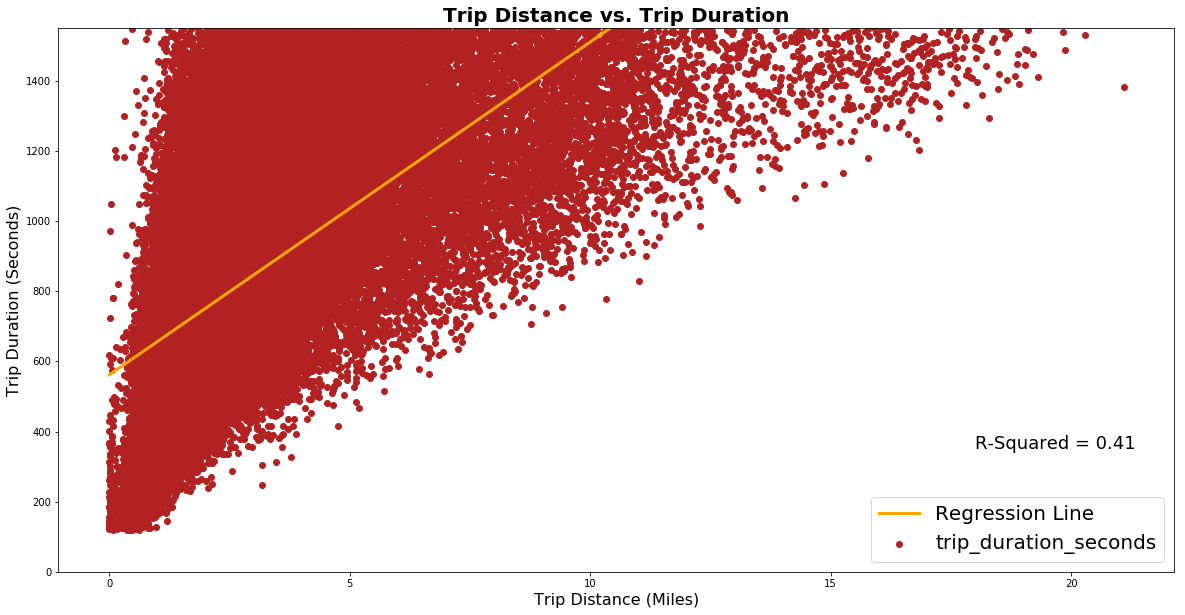

In [21]:



plt.figure(figsize=(20,10))

#Create Scatter Plot
plt.scatter(x, y, color="firebrick")
plt.xlabel('Trip Distance (Miles)', fontsize=16)
plt.ylabel('Trip Duration (Seconds)', fontsize=16)
plt.title('Trip Distance vs. Trip Duration', weight="bold", fontsize=20)
plt.ylim(0,y.max())

# Plot line of best fit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'orange', label = 'Regression Line', lw=3)
plt.legend(loc="lower right", fontsize=20)

#Print the equation of the line of best fit
#64% of trip duration is explained by trip distance
plt.text(18, 350, f'R-Squared = {round(model.rsquared,2)}', fontsize=18)
print(linreg)

#Save figure
plt.savefig('Trip_dist_vs_duration.png')

In [29]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib._png import read_png #Load png file



In [30]:
df_sort = df.sort_values("pickup_datetime", ascending=True).reset_index(drop=True)
df_sort.pickup_datetime[len(df_sort)-1].date()
df_sort["dates"] = [x.date() for x in df_sort.pickup_datetime]
dateGroup = df_sort.groupby("dates").trip_id.count()

dateGroupDF = pd.DataFrame(dateGroup).reset_index()
dateGroupDF.columns = ["dates", "tripCount"]

dateGroupDF = dateGroupDF.drop(len(dateGroupDF)-1, axis=0) #drop 9/1/2015 (missing rides)

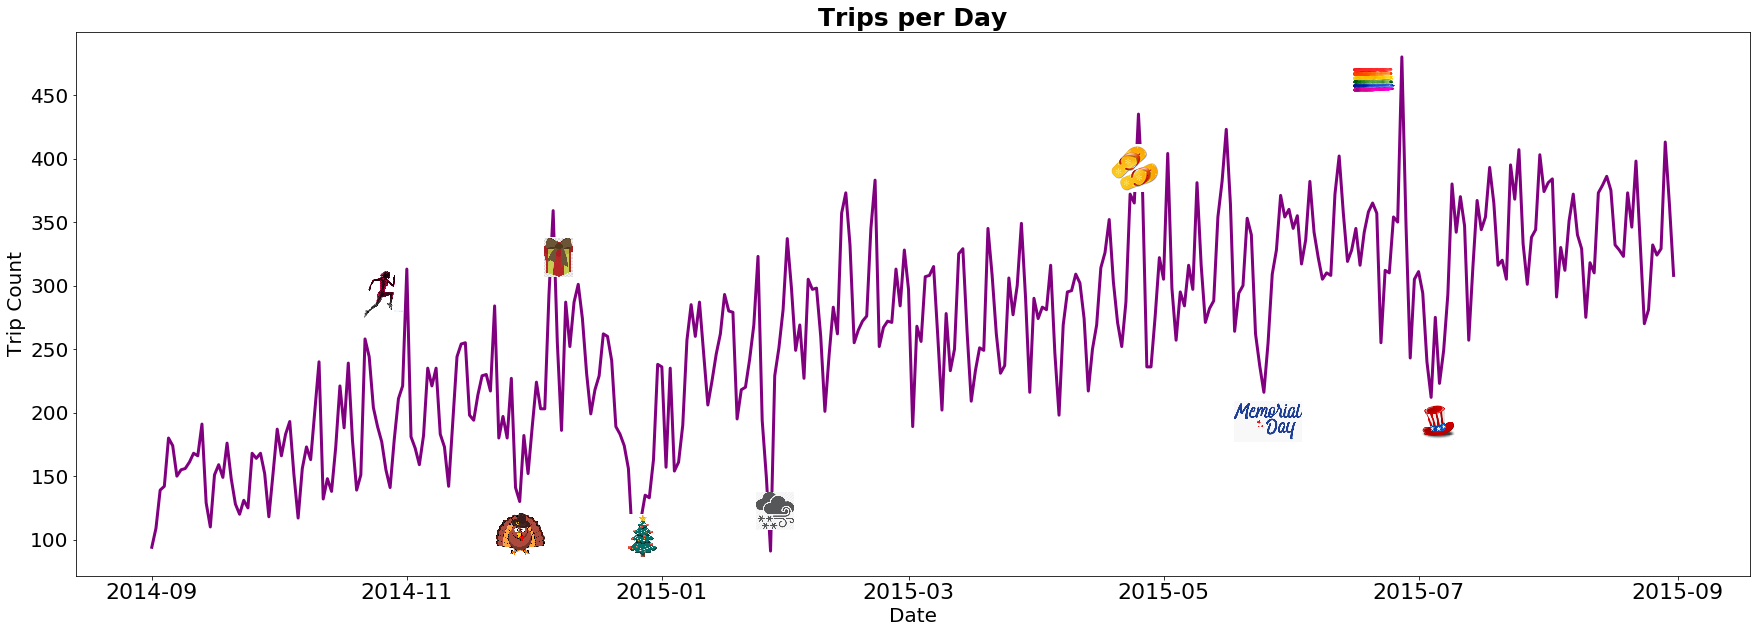

In [34]:
#https://github.com/geoninja/Uber-Data-Analysis/blob/master/NYC_Uber_Rides.ipynb


fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)

ax.plot(dateGroupDF.dates, dateGroupDF.tripCount, color="purple", label="Trips", lw=3)

plt.title("Trips per Day", weight="bold", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Trip Count", fontsize=20)

plt.xticks(fontsize=22)
plt.yticks(fontsize=20)

#Add icon to indicate NYC Marathon 11-2-2014 on the plot
#I had to off set the date for the icon inorder to show visiulization correctly:
img3 = read_png('Data/icons/NYCMARATHON.PNG')
imagebox = OffsetImage(img3, zoom=0.09) 
xy = ['2014-10-25', 300] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Thanksgiving Holiday 11-27-2014 on the plot:
img3 = read_png('Data/icons/turkey.png')
imagebox = OffsetImage(img3, zoom=0.20) 
xy = ['2014-11-27', 112] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Busiest Retail B&M Holiday Shopping Weekend on the plot:
img3 = read_png('Data/icons/shopping.png')
imagebox = OffsetImage(img3, zoom=0.22) 
xy = ['2014-12-06', 330] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)


#Add icon to indicate Christmas to New Year on the plot:
img2 = read_png('Data/icons/ChristmasT.png')
imagebox = OffsetImage(img2, zoom=0.07) 
xy = ['2014-12-25', 98] 
ab = AnnotationBbox(imagebox, xy, xybox=(10., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate blizzard-state of emergency
#no driving allowed on 1-26/27 on the plot:
img3 = read_png('Data/icons/Snow-48.png')
imagebox = OffsetImage(img3, zoom=0.25) 
xy = ['2015-01-27', 130] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)


#Add icon to indicate NYC Spring break holiday 4/25 to 5/1 on the plot:
img5 = read_png('Data/icons/Vacation.png')
imagebox = OffsetImage(img5, zoom=0.99) 
xy = ['2015-04-23', 400] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Pride Day - US Supreme Court June 26, 2015
#I had to off set dates due to position/framing of icon on the plot:
img3 = read_png('Data/icons/flag.png')
imagebox = OffsetImage(img3, zoom=0.13) 
xy = ['2015-06-19', 470] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)


#Add icon to indicate Memorial Day Holiday on the plot:
img3 = read_png('Data/icons/MemorialDay.png')
imagebox = OffsetImage(img3, zoom=0.25) 
xy = ['2015-05-25', 200] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Independence Day Holiday on the plot:
img5 = read_png('Data/icons/4tha-48.png')
imagebox = OffsetImage(img5, zoom=0.8) 
xy = ['2015-07-04', 200] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)



fig.show()
